In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
plt.rcParams['font.size'] = 20

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/SEED_V/Pre-processed/train_data.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/SEED_V/Pre-processed/test_data.csv')

In [ ]:
train.shape

(753840, 312)

In [ ]:
test.shape

(251280, 312)

In [ ]:
train.isnull().sum()

,0
C1B1,0
C1B2,0
C1B3,0
C1B4,0
C1B5,0
...,...
C62B3,0
C62B4,0
C62B5,0
Pre_Lable,0


In [ ]:
test.isnull().sum()

,0
C1B1,0
C1B2,0
C1B3,0
C1B4,0
C1B5,0
...,...
C62B3,0
C62B4,0
C62B5,0
Pre_Lable,0


In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
train.head()

,C1B1,C1B2,C1B3,C1B4,C1B5,C2B1,C2B2,C2B3,C2B4,C2B5,...,C61B3,C61B4,C61B5,C62B1,C62B2,C62B3,C62B4,C62B5,Pre_Lable,Self_Lable
0,0.023823,0.015220,0.013427,0.026662,0.081287,0.021328,0.014302,0.010903,0.018403,0.042652,...,0.004839,0.009372,0.013329,0.012648,0.006433,0.006801,0.011032,0.014453,4,2
1,0.024147,0.015551,0.014704,0.027202,0.081356,0.021335,0.014272,0.010928,0.018378,0.042348,...,0.004927,0.009345,0.013336,0.012537,0.006533,0.006887,0.010946,0.014770,4,2
2,0.023418,0.015851,0.014020,0.025730,0.080590,0.021343,0.014253,0.010910,0.018414,0.042192,...,0.005309,0.009748,0.013560,0.012581,0.006361,0.007009,0.011038,0.014970,4,2
3,0.022858,0.014889,0.013187,0.028044,0.080432,0.021320,0.014295,0.010880,0.018484,0.042079,...,0.005268,0.009617,0.013406,0.012453,0.006414,0.007103,0.011275,0.014766,4,2
4,0.023058,0.014501,0.013751,0.028473,0.080372,0.021201,0.014512,0.010523,0.018260,0.043866,...,0.005150,0.009794,0.013077,0.012339,0.006092,0.007156,0.011229,0.014545,4,2


In [ ]:
test.head()

,C1B1,C1B2,C1B3,C1B4,C1B5,C2B1,C2B2,C2B3,C2B4,C2B5,...,C61B3,C61B4,C61B5,C62B1,C62B2,C62B3,C62B4,C62B5,Pre_Lable,Self_Lable
0,0.022717,0.015016,0.012607,0.028746,0.085694,0.021359,0.014239,0.010686,0.018891,0.043309,...,0.004514,0.009459,0.012899,0.012915,0.007199,0.006275,0.011624,0.014699,4,2
1,0.022635,0.015954,0.012371,0.025528,0.082009,0.021341,0.014259,0.010896,0.018464,0.042151,...,0.005478,0.009725,0.013137,0.012502,0.006439,0.007019,0.011211,0.014924,4,2
2,0.022766,0.014920,0.012417,0.028648,0.080859,0.021204,0.014481,0.010720,0.018604,0.043176,...,0.005459,0.009601,0.013217,0.012425,0.006135,0.006987,0.011209,0.014423,4,2
3,0.021293,0.015627,0.013589,0.028245,0.080441,0.021304,0.014140,0.010860,0.017597,0.042589,...,0.005253,0.010314,0.013524,0.012856,0.006132,0.007067,0.011513,0.014749,4,2
4,0.024178,0.015057,0.013625,0.028699,0.081002,0.021666,0.014101,0.010971,0.017527,0.042460,...,0.005325,0.010157,0.013542,0.012114,0.006210,0.007301,0.011267,0.015934,4,2


In [ ]:
train.shape

(753840, 312)

In [ ]:
test.shape

(251280, 312)

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

### Ideal

In [ ]:
X_train = train[['C1B4', 'C1B5', 'C4B1', 'C4B2', 'C4B3', 'C4B4', 'C4B5', 'C6B5', 'C16B5', 'C18B4', 'C18B5', 'C26B5', 'C24B1', 'C24B2', 'C24B3', 'C24B4', 'C24B5', 'C34B1', 'C42B1', 'C42B2', 'C42B3', 'C42B4', 'C42B5', 'C53B1', 'C46B5', 'C3B1', 'C3B3', 'C3B4', 'C3B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C14B1', 'C14B3', 'C22B2', 'C22B4', 'C22B5', 'C28B4', 'C28B5', 'C30B5', 'C40B1', 'C40B2', 'C40B5', 'C38B2', 'C50B4', 'C50B5', 'C55B1', 'C55B2', 'C55B3', 'C55B5']]  # Input features
Y_train = train['Self_Lable']  # Target label

x_test = test[['C1B4', 'C1B5', 'C4B1', 'C4B2', 'C4B3', 'C4B4', 'C4B5', 'C6B5', 'C16B5', 'C18B4', 'C18B5', 'C26B5', 'C24B1', 'C24B2', 'C24B3', 'C24B4', 'C24B5', 'C34B1', 'C42B1', 'C42B2', 'C42B3', 'C42B4', 'C42B5', 'C53B1', 'C46B5', 'C3B1', 'C3B3', 'C3B4', 'C3B5', 'C12B1', 'C12B2', 'C12B3', 'C12B4', 'C12B5', 'C14B1', 'C14B3', 'C22B2', 'C22B4', 'C22B5', 'C28B4', 'C28B5', 'C30B5', 'C40B1', 'C40B2', 'C40B5', 'C38B2', 'C50B4', 'C50B5', 'C55B1', 'C55B2', 'C55B3', 'C55B5']]  # Input features
y_test = test['Self_Lable']  # Target label

In [ ]:
# Train Count
print(Y_train.value_counts())

Self_Lable
5    336087
4    223011
3    128781
2     50256
1      9423
0      6282
Name: count, dtype: int64


In [ ]:
# Train Count
print(y_test.value_counts())

Self_Lable
5    112029
4     74337
3     42927
2     16752
1      3141
0      2094
Name: count, dtype: int64


# Deep Learning Model

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

## Proposed

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 52, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 32)    │        224 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 52, 32)    │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 52, 32)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 32)    │      6,176 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 32)    │         64 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 32)    │        128 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 52, 32)    │          0 │ conv1d_2[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 52, 32)    │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 26, 32)    │          0 │ activation_1[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 26, 64)    │     12,352 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 64)    │        256 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 26, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 26, 64)    │     24,640 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 26, 64)    │      2,112 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 64)    │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 26, 64)    │          0 │ conv1d_5[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 26, 64)    │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 13, 64)    │          0 │ activation_3[0][

 Total params: 937,766 (3.58 MB)

 Trainable params: 935,846 (3.57 MB)

 Non-trainable params: 1,920 (7.50 KB)

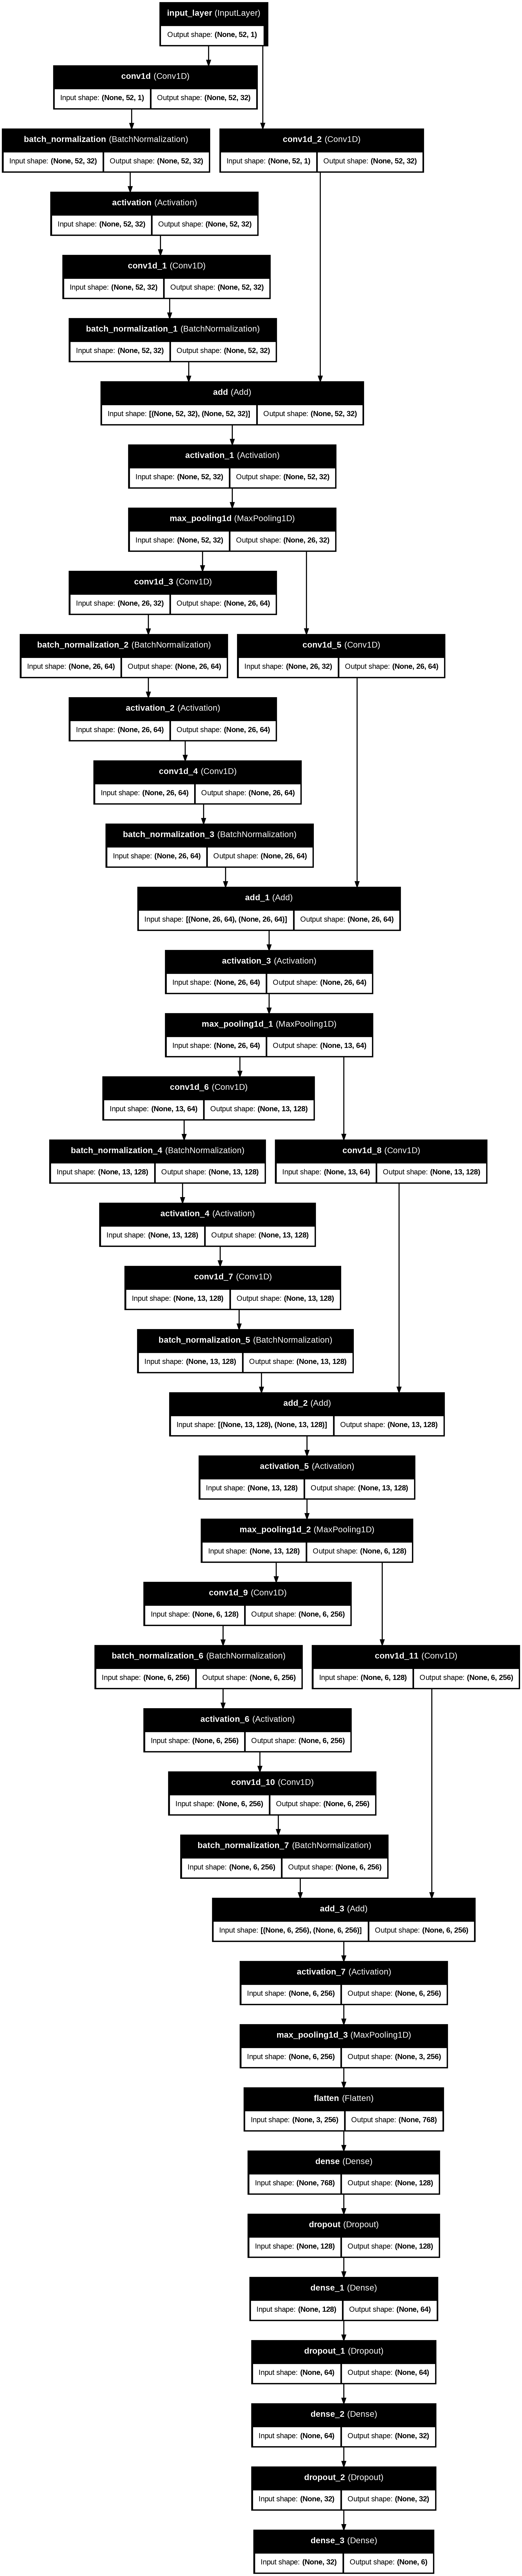

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(6, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
7539/7539 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7000 - loss: 0.7372
Epoch 1: accuracy improved from -inf to 0.82387, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/CNNweights-improvement-01-0.8239.keras
7539/7539 ━━━━━━━━━━━━━━━━━━━━ 90s 9ms/step - accuracy: 0.7000 - loss: 0.7372 - val_accuracy: 0.4816 - val_loss: 1.8876
Epoch 2/100
7539/7539 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9416 - loss: 0.1670
Epoch 2: accuracy improved from 0.82387 to 0.94897, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/CNNweights-improvement-02-0.9490.keras
7539/7539 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9416 - loss: 0.1670 - val_accuracy: 0.5576 - val_loss: 1.7305
Epoch 3/100
7539/7539 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9641 - loss: 0.1063
Epoch 3: accuracy improved from 0.94897 to 0.96625, saving model to /content

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/model.h5")

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9608 - loss: 0.1769
Test Accuracy: 96.48%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9608 - loss: 0.1769
Test loss: 0.16216330230236053
Test accuracy: 0.9647843241691589


In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
Test Accuracy for Class 0: 97.18%
Test Accuracy for Class 1: 97.48%
Test Accuracy for Class 2: 94.94%
Test Accuracy for Class 3: 95.15%
Test Accuracy for Class 4: 96.68%
Test Accuracy for Class 5: 97.04%


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


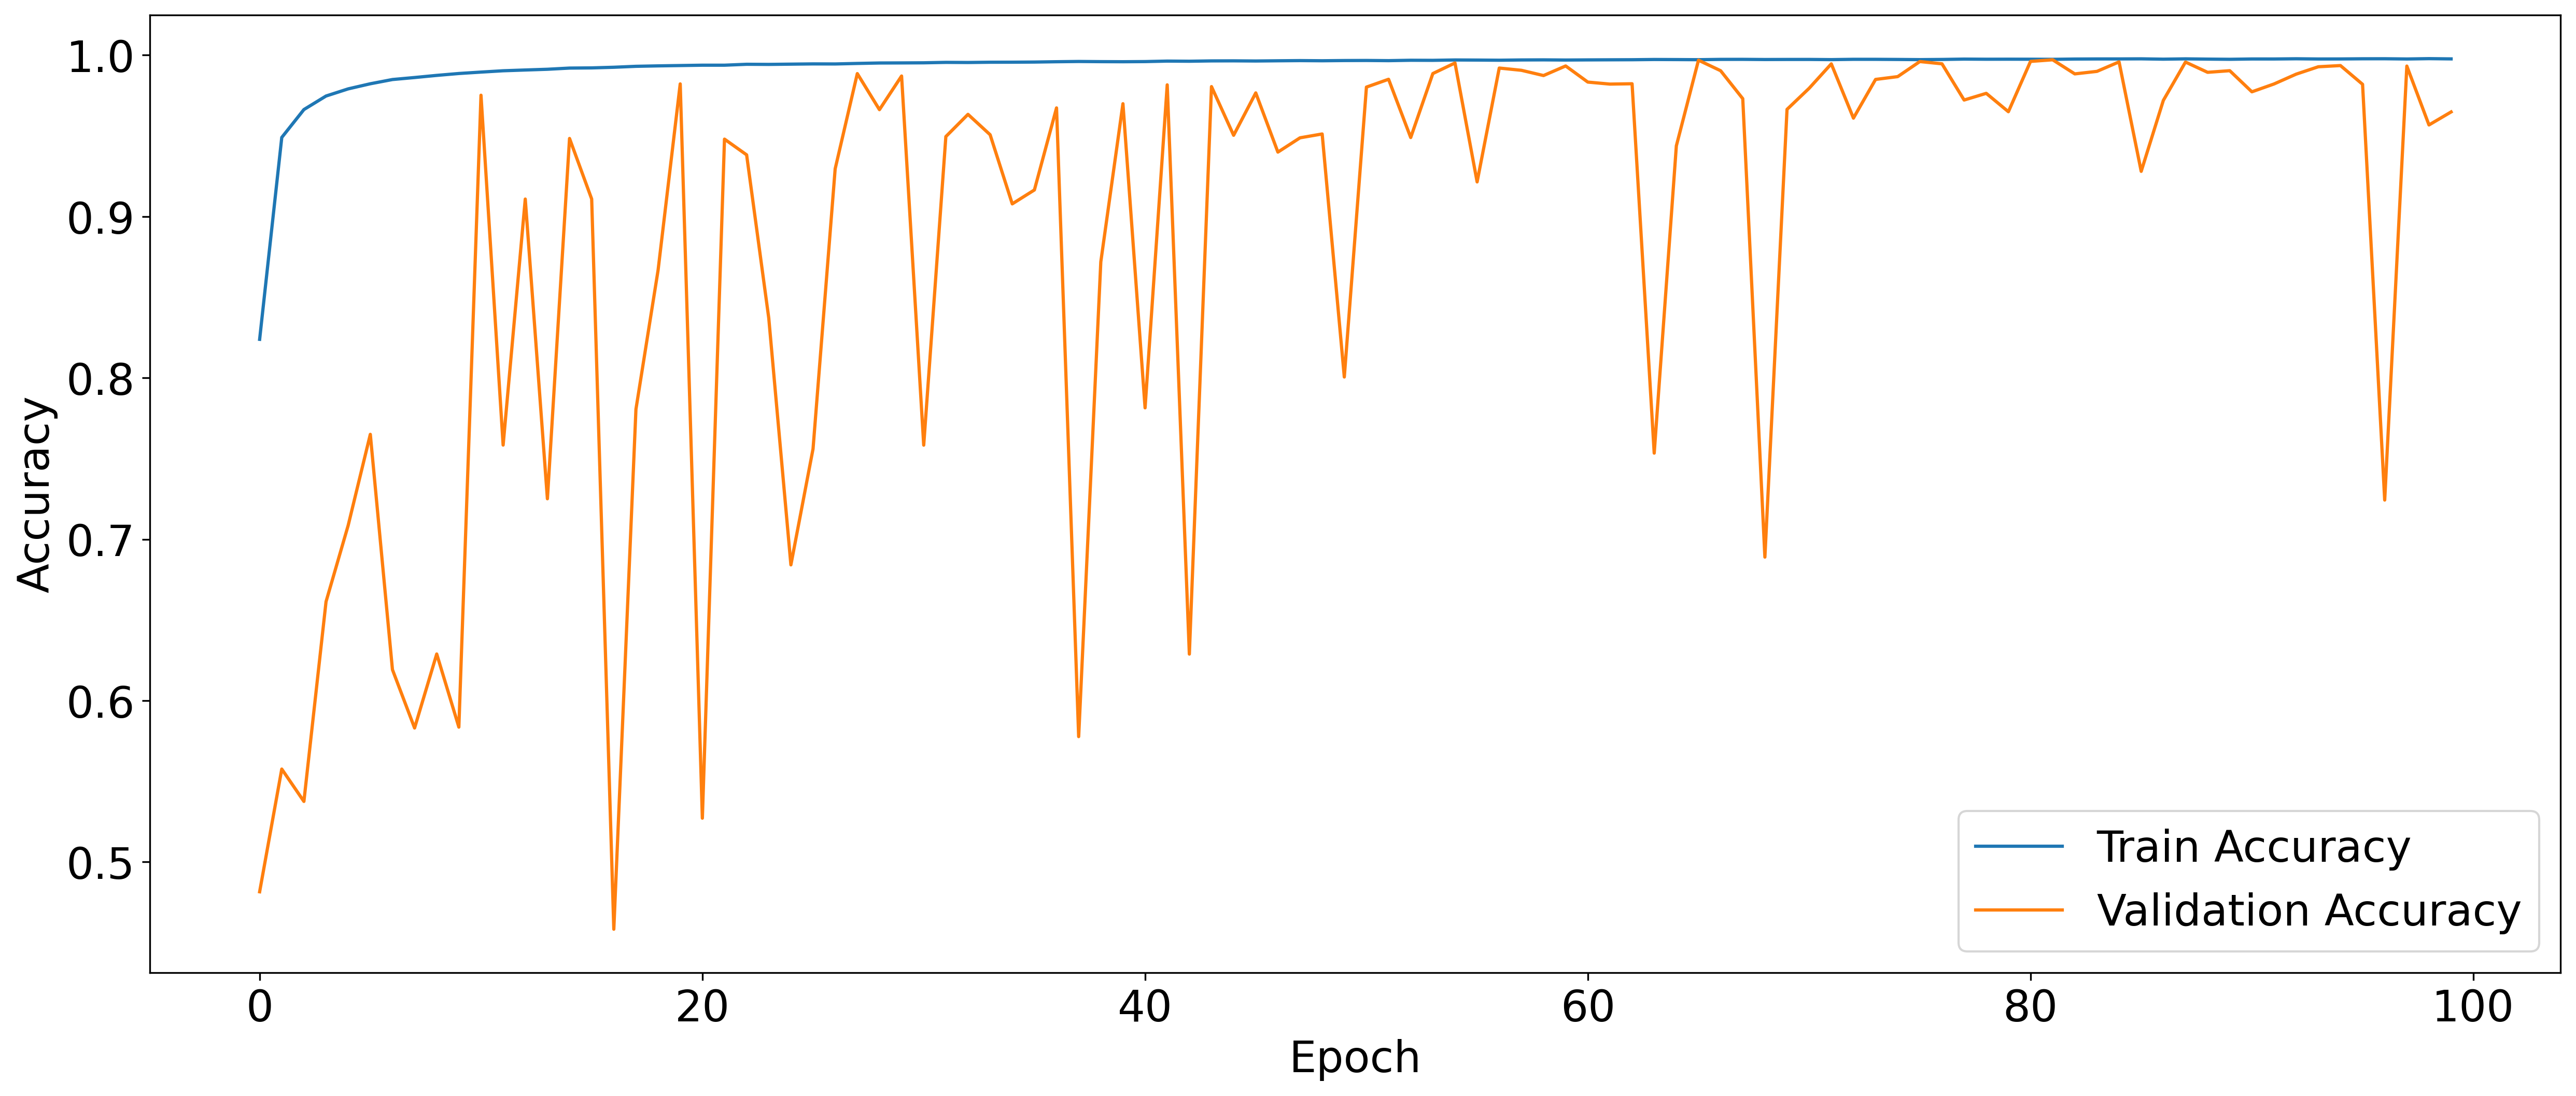

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/SEED-V/Model/Ideal/model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
Confidence interval for accuracy: 0.9643 - 0.9651
Confidence interval for precision: 0.9643 - 0.9651
Confidence interval for recall: 0.9643 - 0.9651
Confidence interval for F1 score: 0.9643 - 0.9651


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9608 - loss: 0.1769
Test loss: 0.16216330230236053
Test accuracy: 0.9647843241691589


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2094
           1       0.96      0.97      0.97      3141
           2       0.93      0.95      0.94     16752
           3       0.96      0.95      0.96     42927
           4       0.97      0.97      0.97     74337
           5       0.97      0.97      0.97    112029

   micro avg       0.97      0.96      0.96    251280
   macro avg       0.96      0.96      0.96    251280
weighted avg       0.97      0.96      0.96    251280
 samples avg       0.96      0.96      0.96    251280



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


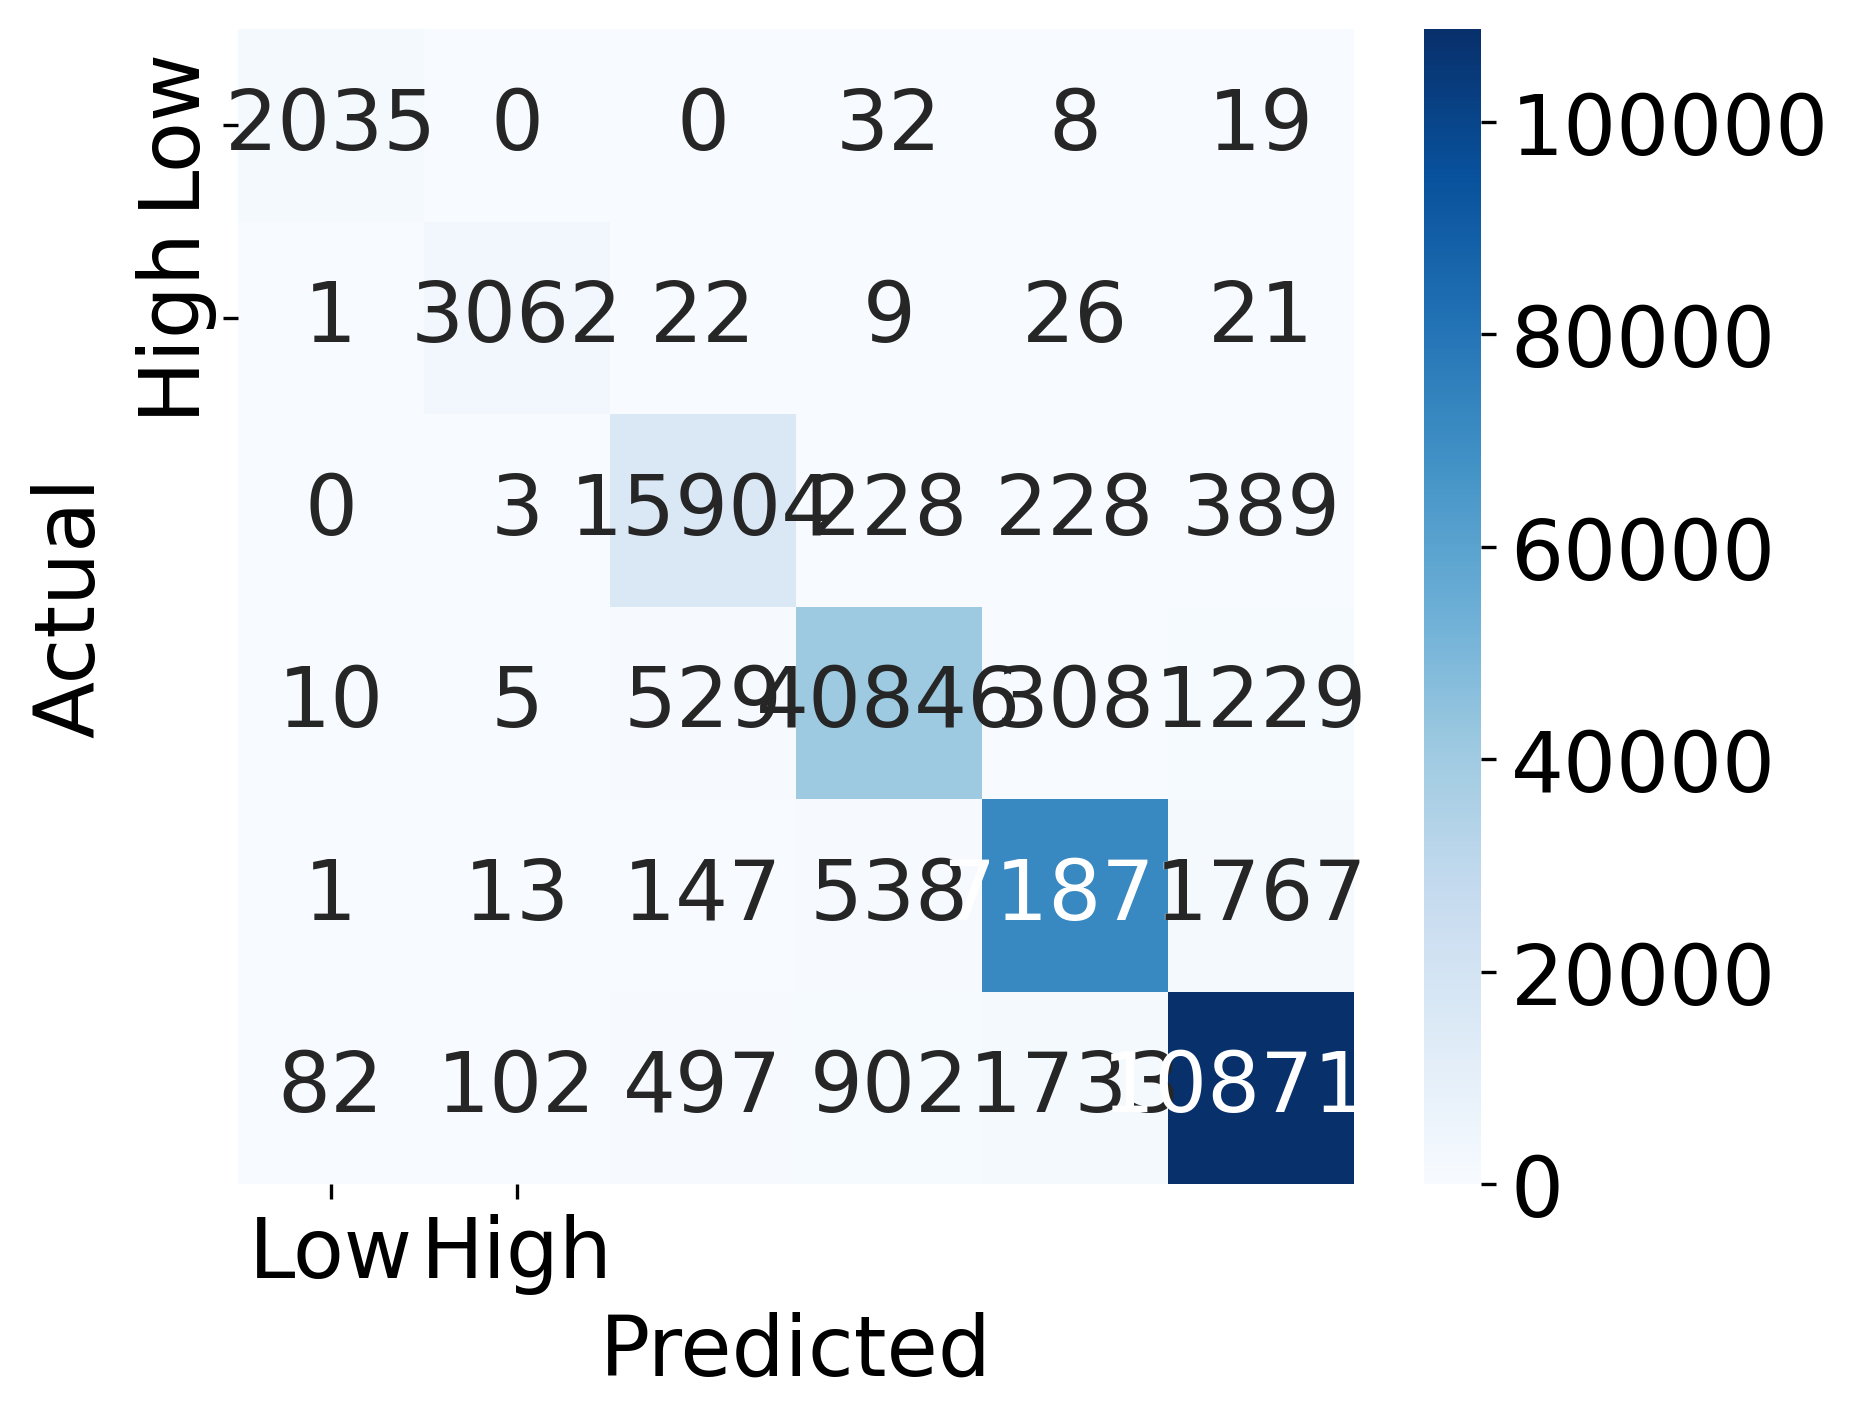

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

7853/7853 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


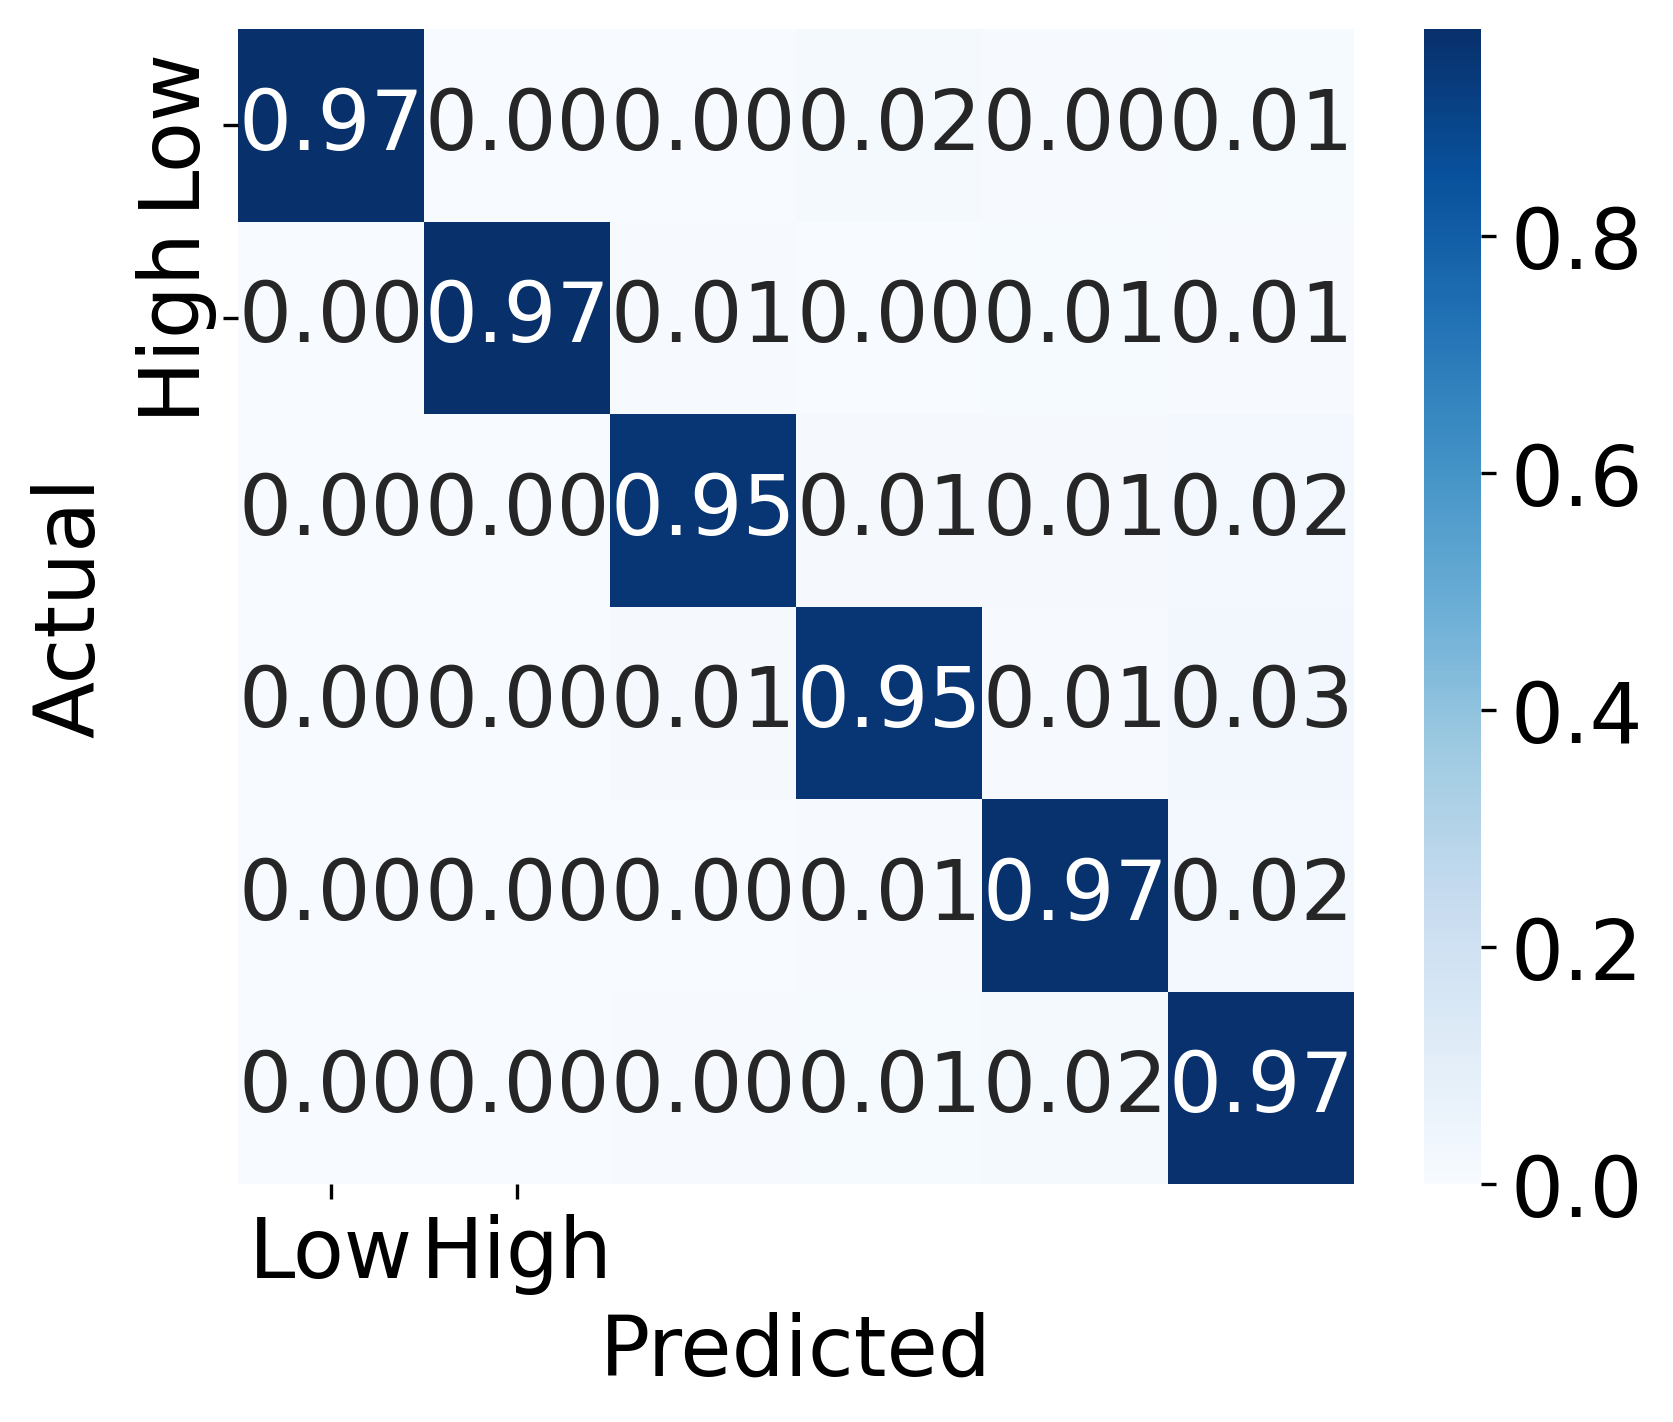

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()